### 1. Анализ имеющихся данных

##### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

##### Посмотрим на тренировочные данные

In [2]:
data = pd.read_parquet('train.parquet')

In [3]:
data.head(3)

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


##### Изучим структуру данных в столбцах dates и values

In [5]:
data.dates[0], len(data.dates[0])

(array([datetime.date(2016, 1, 1), datetime.date(2016, 2, 1),
        datetime.date(2016, 3, 1), datetime.date(2016, 4, 1),
        datetime.date(2016, 5, 1), datetime.date(2016, 6, 1),
        datetime.date(2016, 7, 1), datetime.date(2016, 8, 1),
        datetime.date(2016, 9, 1), datetime.date(2016, 10, 1),
        datetime.date(2016, 11, 1), datetime.date(2016, 12, 1),
        datetime.date(2017, 1, 1), datetime.date(2017, 2, 1),
        datetime.date(2017, 3, 1), datetime.date(2017, 4, 1),
        datetime.date(2017, 5, 1), datetime.date(2017, 6, 1),
        datetime.date(2017, 7, 1), datetime.date(2017, 8, 1),
        datetime.date(2017, 9, 1), datetime.date(2017, 10, 1),
        datetime.date(2017, 11, 1), datetime.date(2017, 12, 1),
        datetime.date(2018, 1, 1), datetime.date(2018, 2, 1),
        datetime.date(2018, 3, 1), datetime.date(2018, 4, 1),
        datetime.date(2018, 5, 1), datetime.date(2018, 6, 1),
        datetime.date(2018, 7, 1), datetime.date(2018, 8, 1),
  

In [6]:
data.values[0], len(data.values[0])

(array([19114,
        array([datetime.date(2016, 1, 1), datetime.date(2016, 2, 1),
               datetime.date(2016, 3, 1), datetime.date(2016, 4, 1),
               datetime.date(2016, 5, 1), datetime.date(2016, 6, 1),
               datetime.date(2016, 7, 1), datetime.date(2016, 8, 1),
               datetime.date(2016, 9, 1), datetime.date(2016, 10, 1),
               datetime.date(2016, 11, 1), datetime.date(2016, 12, 1),
               datetime.date(2017, 1, 1), datetime.date(2017, 2, 1),
               datetime.date(2017, 3, 1), datetime.date(2017, 4, 1),
               datetime.date(2017, 5, 1), datetime.date(2017, 6, 1),
               datetime.date(2017, 7, 1), datetime.date(2017, 8, 1),
               datetime.date(2017, 9, 1), datetime.date(2017, 10, 1),
               datetime.date(2017, 11, 1), datetime.date(2017, 12, 1),
               datetime.date(2018, 1, 1), datetime.date(2018, 2, 1),
               datetime.date(2018, 3, 1), datetime.date(2018, 4, 1),
             

##### Посмотрим на распределение целевой переменной

In [7]:
data.label.value_counts()

,count
label,
0.0,57820
1.0,22180


<BarContainer object of 2 artists>

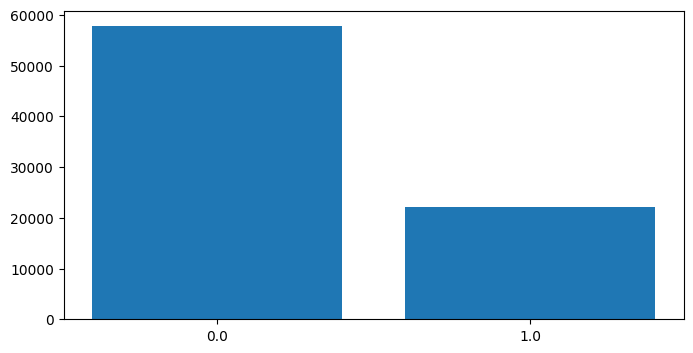

In [8]:
plt.figure(figsize=(8,4))

plt.bar(data.label.value_counts().index,
        data.label.value_counts(),
        tick_label = data.label.value_counts().index
        )

Данные в датасете не сбалансированы, и присутствует явный дисбаланс

##### Нарисуем несколько временных рядов разных классов, чтобы посмотреть с чем мы имеем дело

Для этого напишем функцию, которая на вход будет принимать четное значение N и выводить в два столбца графики разных классов

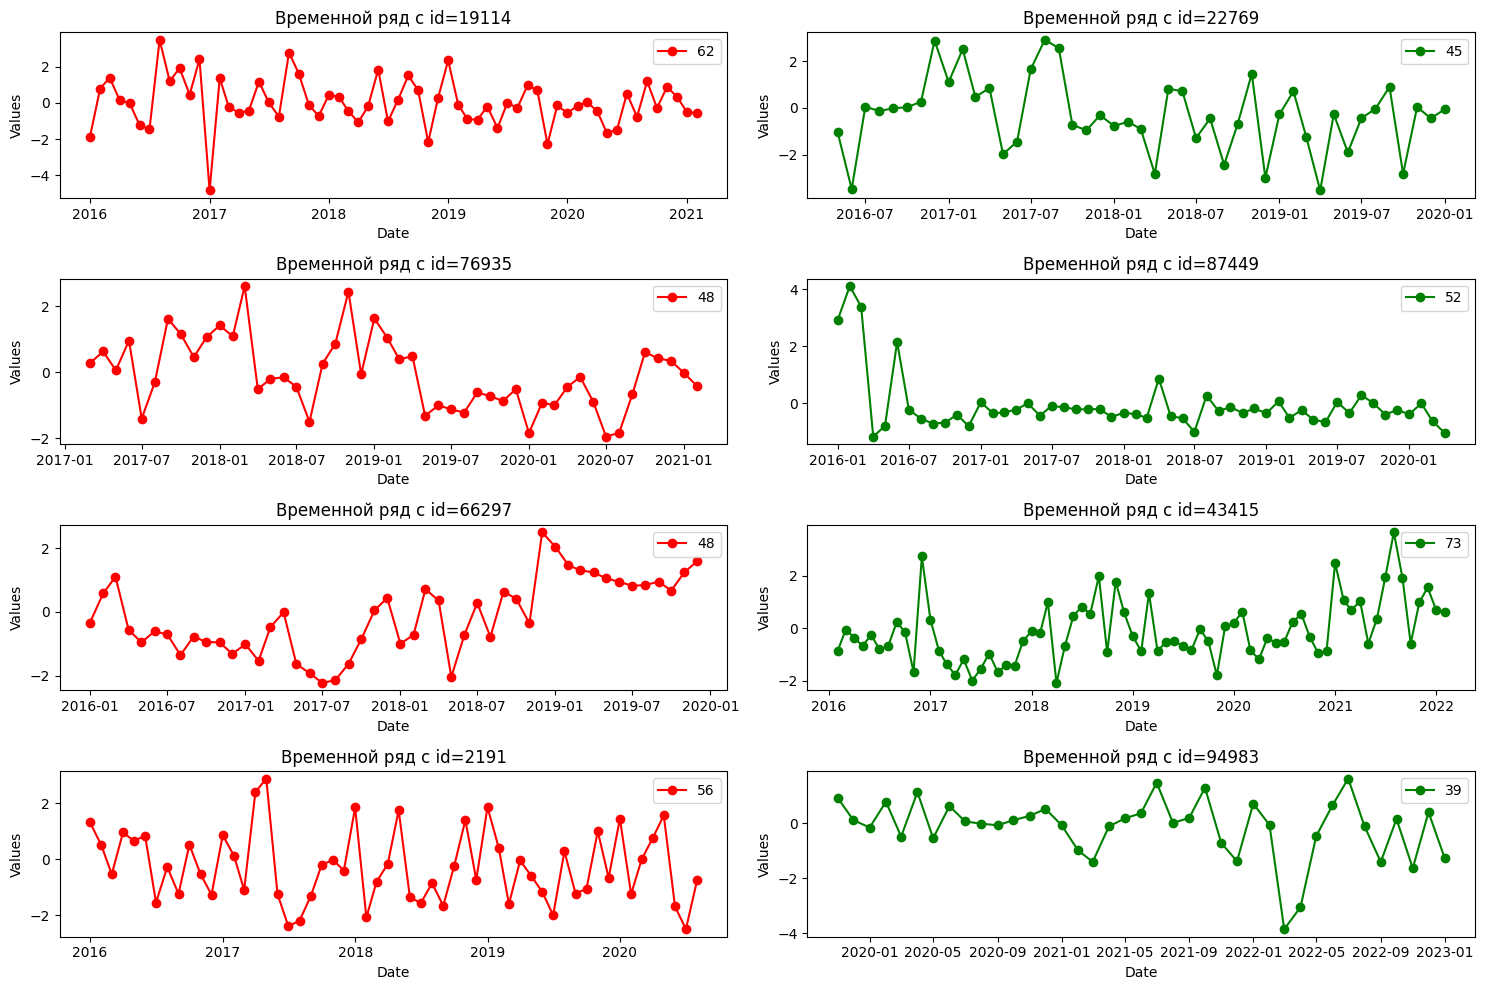

In [9]:
def time_plot(n: int):
    fig, axs = plt.subplots(n // 2, 2, figsize=(15, 10))

    k1, k2 = -1, -1
    for i, row in enumerate(data.values):
        if k1 + k2 >= n - 2:
            break

        if int(row[3]) == 0 and k1 < (n // 2) - 1:
            k1 += 1
            ax = axs[k1, 0]
            ax.plot(data.dates[i], row[2], marker='o', color='r')
            ax.set_xlabel('Date')
            ax.set_ylabel('Values')
            ax.legend([len(row[2])])
            ax.set_title(f'Временной ряд с id={data.id[i]}')

        elif int(row[3]) == 1 and k2 < (n // 2) - 1:
            k2 += 1
            ax = axs[k2, 1]
            ax.plot(data.dates[i], row[2], marker='o', color='g')
            ax.set_xlabel('Date')
            ax.set_ylabel('Values')
            ax.legend([len(row[2])])
            ax.set_title(f'Временной ряд с id={data.id[i]}')

    plt.tight_layout()
    plt.show()

time_plot(8)

По графикам можно понять, что в датасете присутствуют временные ряды за разные временные промежутки и с разным количеством наблюдений

##### Посмотрим на то, сколько уникальных дат содержится в данных

In [10]:
data.dates.explode().value_counts()

,count
dates,
2019-12-01,78965
2019-11-01,78845
2019-10-01,78590
2019-09-01,78326
2019-08-01,78163
...,...
2023-09-01,6289
2023-10-01,4868
2023-11-01,3442


Так как у нас всего 97 уникальных дат, то используем их в качестве новых признаков

In [11]:
def row_to_dict(row):
    row_dict = {'id': row.iloc[0]}
    for date, value in zip(row.iloc[1], row.iloc[2]):
        row_dict[date] = value
    row_dict['label'] = row.iloc[3]
    return row_dict

new_data = pd.DataFrame(data.apply(row_to_dict, axis=1).tolist())
new_data.columns = new_data.columns.astype(str)
new_data.head(3)

,id,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,...,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01
0,19114,-1.86,0.79,1.4,0.15,0.00,-1.24,-1.46,3.49,1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22769,NaN,NaN,NaN,NaN,-1.04,-3.48,0.05,-0.13,-0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          80000 non-null  int64  
 1   2016-01-01  45687 non-null  float64
 2   2016-02-01  52783 non-null  float64
 3   2016-03-01  55387 non-null  float64
 4   2016-04-01  57194 non-null  float64
 5   2016-05-01  58400 non-null  float64
 6   2016-06-01  59168 non-null  float64
 7   2016-07-01  60195 non-null  float64
 8   2016-08-01  60813 non-null  float64
 9   2016-09-01  61464 non-null  float64
 10  2016-10-01  62159 non-null  float64
 11  2016-11-01  62769 non-null  float64
 12  2016-12-01  63264 non-null  float64
 13  2017-01-01  66743 non-null  float64
 14  2017-02-01  67595 non-null  float64
 15  2017-03-01  68268 non-null  float64
 16  2017-04-01  68874 non-null  float64
 17  2017-05-01  69410 non-null  float64
 18  2017-06-01  69982 non-null  float64
 19  2017-07-01  70394 non-nul

##### Посмотрим на качество, которое можно получить без обработки пропусков и создания новых признаков

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
X = new_data.drop('label', axis=1)
y = new_data['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

DecisionTreeClassifier

In [16]:
tree = DecisionTreeClassifier(random_state=22, max_depth=10)

In [17]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=22)

In [18]:
tree_pred = tree.predict_proba(X_test)[:, 1]

In [19]:
print(f'Качество ROC-AUC: {roc_auc_score(y_test, tree_pred)}')

Качество ROC-AUC: 0.7207768846876151


RandomForest

In [20]:
forest = RandomForestClassifier(random_state=22, n_estimators = 100, max_depth = 15, min_samples_leaf = 3, n_jobs=-1)

In [21]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_jobs=-1,
                       random_state=22)

In [22]:
forest_pred = forest.predict_proba(X_test)[:, 1]

In [23]:
print(f'Качество ROC-AUC: {roc_auc_score(y_test, forest_pred)}')

Качество ROC-AUC: 0.8319818446197006


RandomForest даёт неплохой результат, но можно попробовать еще поработать с данными для улучшения качества

### 2. Подбор новых признаков

#### 2.1. Замена пропусков средним значением

Попробуем заменить пропуски средним значением и посмотреть на то, как это повлияет на качество

In [24]:
fill_avg_data = new_data.copy()

# отделим целевую переменную от данных, чтобы она не повлияла на среднее
target = fill_avg_data['label']
fill_avg_data = fill_avg_data.drop('label', axis=1)

fill_avg_data.iloc[:, 1:] = fill_avg_data.iloc[:, 1:].apply(lambda row: row.fillna(row.mean()), axis=1)

fill_avg_data.head(3)

,id,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,...,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01
0,19114,-1.860000,0.790000,1.400000,0.150000,0.000000,-1.240000,-1.460000,3.490000,1.200000,...,0.023710,0.023710,0.023710,0.023710,0.023710,0.023710,0.023710,0.023710,0.023710,0.023710
1,22769,-0.310777,-0.310777,-0.310777,-0.310777,-1.040000,-3.480000,0.050000,-0.130000,-0.010000,...,-0.310777,-0.310777,-0.310777,-0.310777,-0.310777,-0.310777,-0.310777,-0.310777,-0.310777,-0.310777
2,76935,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,...,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042,-0.046042


In [25]:
X = fill_avg_data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

forest = RandomForestClassifier(random_state=22, n_estimators = 100, max_depth = 15, min_samples_leaf = 3, n_jobs=-1)

forest.fit(X_train, y_train)

forest_pred = forest.predict_proba(X_test)[:, 1]

print(f'Качество ROC-AUC после замены пропусков средним: {roc_auc_score(y_test, forest_pred)}')

Качество ROC-AUC после замены пропусков средним: 0.8571178750143531


Вывод: Значение метрики особо не улучшилось, но заменяя NaN значения пропусками мы сильно изменили структуру наших рядов, что не очень хорошо

#### 2.2. Замена пропусков медианой

In [26]:
fill_median_data = new_data.copy()

# отделим целевую переменную от данных, чтобы она не повлияла на медиану
target = fill_median_data['label']
fill_median_data = fill_median_data.drop('label', axis=1)

fill_median_data.iloc[:, 1:] = fill_median_data.iloc[:, 1:].apply(lambda row: row.fillna(row.median()), axis=1)

fill_median_data.head(3)

,id,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,...,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01
0,19114,-1.860000,0.790000,1.400000,0.150000,0.000,-1.240,-1.460,3.490,1.200,...,-0.110000,-0.110000,-0.110000,-0.110000,-0.110000,-0.110000,-0.110000,-0.110000,-0.110000,-0.110000
1,22769,-0.274409,-0.274409,-0.274409,-0.274409,-1.040,-3.480,0.050,-0.130,-0.010,...,-0.274409,-0.274409,-0.274409,-0.274409,-0.274409,-0.274409,-0.274409,-0.274409,-0.274409,-0.274409
2,76935,-0.145000,-0.145000,-0.145000,-0.145000,-0.145,-0.145,-0.145,-0.145,-0.145,...,-0.145000,-0.145000,-0.145000,-0.145000,-0.145000,-0.145000,-0.145000,-0.145000,-0.145000,-0.145000


In [27]:
X = fill_median_data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

forest = RandomForestClassifier(random_state=22, n_estimators = 100, max_depth = 15, min_samples_leaf = 3, n_jobs=-1)

forest.fit(X_train, y_train)

forest_pred = forest.predict_proba(X_test)[:, 1]

print(f'Качество ROC-AUC после замены пропусков медианой: {roc_auc_score(y_test, forest_pred)}')

Качество ROC-AUC после замены пропусков медианой: 0.8215203319651512


Вывод: Значение метрики после преобразования данных ухудшилось, значит стоит отказаться от попыток заменить NaN какой-то мерой центральной тенденции

#### 2.3. Добавление характеристик в качестве новых признаков

Добавим несколько характеристик в качестве новых признаков

In [28]:
new_df = new_data.copy()

In [29]:
# отделим целевую переменную от данных, чтобы она не повлияла на характеристики
target = new_df['label']
new_df = new_df.drop('label', axis=1)

In [30]:
mean = new_df.iloc[:, 1:].apply(lambda row: row.dropna().mean(), axis=1).rename('mean') # среднее значение
median = new_df.iloc[:, 1:].apply(lambda row: row.dropna().median(), axis=1).rename('median') # медиана
variance = new_df.iloc[:, 1:].apply(lambda row: row.dropna().var(), axis=1).rename('variance') # дисперсия
sign_sum = new_df.iloc[:, 1:].apply(lambda row: 1 if row.dropna().sum() >= 0 else 0, axis=1).rename('sign_sum') # знак суммы значений ряда
sign_last_value = new_df.iloc[:, 1:].apply(lambda row: 1 if not row.dropna().empty and row.dropna().iloc[-1] >= 0 else 0, axis=1).rename('sign_last_value') # знак последнего значения
count_non_nan = new_df.iloc[:, 1:].apply(lambda row: row.dropna().count(), axis=1).rename('count_non_nan') # количество наблюдений в ряду

In [31]:
concat_df = pd.concat([new_df, mean, median, variance, sign_sum, sign_last_value, count_non_nan], axis = 1)
concat_df.columns = concat_df.columns.astype(str)
concat_df.head(3)

,id,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,...,2023-10-01,2023-11-01,2023-12-01,2024-01-01,mean,median,variance,sign_sum,sign_last_value,count_non_nan
0,19114,-1.86,0.79,1.4,0.15,0.00,-1.24,-1.46,3.49,1.20,...,NaN,NaN,NaN,NaN,0.023710,-0.110000,1.817614,1,0,62
1,22769,NaN,NaN,NaN,NaN,-1.04,-3.48,0.05,-0.13,-0.01,...,NaN,NaN,NaN,NaN,-0.310777,-0.274409,2.477235,0,0,45
2,76935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.046042,-0.145000,1.158407,0,0,48


In [32]:
X = concat_df
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

forest = RandomForestClassifier(random_state=22, n_estimators = 100, max_depth = 15, min_samples_leaf = 3, n_jobs=-1)

forest.fit(X_train, y_train)

forest_pred = forest.predict_proba(X_test)[:, 1]

print(f'Качество ROC-AUC после добавления новых признаков: {roc_auc_score(y_test, forest_pred)}')

Качество ROC-AUC после добавления новых признаков: 0.8797461962584037


Вывод: Добавление новых признаков значительно улучшило метрику, так что теперь можно попробовать обучить бустинг и поперебирать гиперпараметры

#### 3. Подбор гиперпараметров

Обучим градиентный бустинг и переберем его параметры для улучшения качества

In [33]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.9 MB/s eta 0:00:00


In [34]:
import optuna
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 14),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-2, 10, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-2, 10, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 22,
    }

    model = XGBClassifier(**params, tree_method='hist', eval_metric='logloss', device='cuda')
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Лучшие параметры: ", study.best_params)
print("Максимальный ROC AUC: ", study.best_value)

[I 2024-10-23 18:29:10,529] A new study created in memory with name: no-name-d3b4a288-4721-4e80-9f43-02e116e9af84
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:29:14] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
[I 2024-10-23 18:29:14,519] Trial 0 finished with value: 0.8825598060660357 and parameters: {'n_estimators': 468, 'max_depth': 6, 'learning_rate': 0.01738820318526838, 'reg_lambda': 9.368502154631942, 'reg_alpha': 0.23418260106085598, 'subsample': 0.9285398566003362, 'colsample_bytree': 0.8141514254566358}. Best is trial 0 with 

Лучшие параметры:  {'n_estimators': 868, 'max_depth': 9, 'learning_rate': 0.07463628296694025, 'reg_lambda': 8.843349896230604, 'reg_alpha': 0.014174640632816362, 'subsample': 0.7645265920134621, 'colsample_bytree': 0.7089616740292881}
Максимальный ROC AUC:  0.9127640109118383


Самое высокое качество показал XGBoost: 0.9127640109118383. Обучим бустинг с лучшими параметрами.

In [38]:
best_params = study.best_params

best_model = XGBClassifier(**best_params,
                           tree_method = 'hist',
                           eval_metric = 'logloss',
                           device = 'cuda',
                           random_state = 22)

# Обучаем модель на полном тренировочном наборе данных
best_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7089616740292881, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07463628296694025,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=868, n_jobs=None,
              num_parallel_tree=None, random_state=22, ...)

Сохраним веса модели

In [39]:
import joblib

joblib.dump(best_model, "model.pkl")

['model.pkl']

#### 4. Создание прогноза на тестовой выборке

Для создания предсказаний на новых данных воспользуемся следующим скриптом (код дублирует файл script.py)

In [5]:
import pickle
import pandas as pd
import logging

# Настройка базовых конфигураций логов
def configure_logging(level):
    logging.basicConfig(
        level=level,
        datefmt="%Y-%m-%d %H:%M:%S",
        format="[%(asctime)s.%(msecs)03d] %(module)10s:%(lineno)-3d %(levelname)-7s - %(message)s",
    )
logger = logging.getLogger(__name__)
configure_logging(level=logging.INFO)

# Импорт данных
data = pd.read_parquet('test.parquet')

# Первый этап обработки данных
def step_1(df):
    # Распарсим наши данные так, чтобы даты стали новыми фичами
    def row_to_dict(row):
        row_dict = {'id': row.iloc[0]}
        for date, value in zip(row.iloc[1], row.iloc[2]):
            row_dict[date] = value
        return row_dict

    new_data = pd.DataFrame(df.apply(row_to_dict, axis=1).tolist())
    new_data.columns = new_data.columns.astype(str)
    logger.info("Первый этап обработки данных завершен")
    return new_data

def step_2(df):
    # Создаем новые фичи
    mean = df.iloc[:, 1:].apply(lambda row: row.dropna().mean(), axis=1).rename('mean')  # среднее значение
    median = df.iloc[:, 1:].apply(lambda row: row.dropna().median(), axis=1).rename('median')  # медиана
    variance = df.iloc[:, 1:].apply(lambda row: row.dropna().var(), axis=1).rename('variance')  # дисперсия
    sign_sum = df.iloc[:, 1:].apply(lambda row: 1 if row.dropna().sum() >= 0 else 0, axis=1).rename(
        'sign_sum')  # знак суммы значений ряда
    sign_last_value = df.iloc[:, 1:].apply(
        lambda row: 1 if not row.dropna().empty and row.dropna().iloc[-1] >= 0 else 0, axis=1).rename(
        'sign_last_value')  # знак последнего значения
    count_non_nan = df.iloc[:, 1:].apply(lambda row: row.dropna().count(), axis=1).rename(
        'count_non_nan')  # количество наблюдений в ряду

    concat_df = pd.concat([df, mean, median, variance, sign_sum, sign_last_value, count_non_nan], axis=1)
    concat_df.columns = concat_df.columns.astype(str)
    logger.info("Второй этап обработки данных завершен")
    return concat_df

def step_3(df):
    # Загрузка обученной модели из pickle файла
    with open('model.pkl', 'rb') as file:
        trained_model = pickle.load(file)

    # Сохраняем id
    ids = df['id']

    # Делаем прогноз
    pred = trained_model.predict_proba(df)[:, 1]
    new_submission = pd.DataFrame({'id': ids, 'score': pred})
    new_submission.to_csv('new_submission.csv', index=False)
    # new_submission
    logger.info("submission файл создан")


def main():
    data_1 = step_1(data)
    data_2 = step_2(data_1)
    data_3 = step_3(data_2)

if __name__ == "__main__":
    main()

[2024-10-23 22:26:17.067] 4131770692:29  INFO    - Первый этап обработки данных завершен
[2024-10-23 22:26:32.170] 4131770692:47  INFO    - Второй этап обработки данных завершен
[2024-10-23 22:26:32.621] 4131770692:63  INFO    - submission файл создан


Посмотрим на структуру созданного файла

In [41]:
sub = pd.read_csv('new_submission.csv')

sub

,id,score
0,6125,0.022926
1,26781,0.068273
2,13333,0.459772
3,53218,0.011310
4,84204,0.759192
...,...,...
19995,80341,0.092004
19996,5891,0.005375
19997,29091,0.003532
19998,85877,0.330927


Структура файла соответствует примеру